# Midterm

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline
%matplotlib inline

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Get the data
train_data = pd.read_csv("midterm_train.csv")
test_data = pd.read_csv("midterm_test.csv")

In [3]:
train_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02%,...,-3.694592,-1.008670,wednesday,$-180.16,1.236134,4.462951,4.592803,-0.034478,3.680401,0
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.0%,...,6.414948,5.831287,tuesday,$432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,1
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01%,...,0.371862,-7.025987,wednesday,$-119.17,-66.851394,-11.084558,-11.407072,6.395551,3.545332,0
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,-0.0%,...,-2.920478,-2.135088,thurday,$-1309.54,0.442939,11.808383,12.151957,-2.923916,-1.471336,0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02%,...,-1.769904,-0.532896,wednesday,$-1103.32,61.136654,48.077895,49.476758,1.043061,9.927952,1


In [4]:
train_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x39,x40,x41,x42,x45,x46,x47,x48,x49,y
count,159964.000000,159973.000000,159973.000000,159963.000000,159969.000000,159971.000000,159973.000000,159974.000000,159965.000000,159962.000000,...,159952.000000,159969.000000,159980.000000,159965.000000,159972.000000,159974.000000,159970.000000,159974.000000,159974.000000,160000.000000
mean,1.540669,2.020926,0.007805,2.471131,0.004914,0.100313,0.020943,0.000992,0.004064,-0.004841,...,0.019918,-0.014515,-0.004971,0.006440,0.882868,0.070251,0.072817,-0.004404,-0.004627,0.400550
std,16.401459,7.462316,6.806854,9.624773,6.275538,2.173207,7.753960,2.414990,9.165963,2.845066,...,6.698498,4.973109,5.428919,6.743532,23.987879,17.732750,18.248654,4.468600,3.610345,0.490011
min,-68.981217,-31.258618,-30.506154,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-11.978764,...,-27.076148,-23.265768,-24.602106,-32.319316,-121.292948,-72.694807,-74.809917,-20.696774,-16.991354,0.000000
25%,-9.450919,-2.890069,-4.609020,-4.029733,-4.225946,-1.375403,-5.197125,-1.639263,-6.159416,-1.921991,...,-4.508069,-3.381291,-3.668357,-4.523615,-14.596689,-12.239755,-12.595786,-3.020220,-2.438833,0.000000
50%,1.841792,2.202444,0.010002,2.584225,-0.005805,0.058102,-0.017482,0.000816,0.244471,-0.001742,...,0.027664,0.001465,-0.017824,0.010728,0.890783,-0.449057,-0.462448,-0.000494,-0.001601,0.000000
75%,12.786656,7.002078,4.623164,9.015845,4.256802,1.550611,5.268370,1.627674,6.257305,1.918158,...,4.550137,3.344760,3.649917,4.562162,16.559588,11.987409,12.336756,3.003253,2.424888,1.000000
max,70.882303,39.193550,28.699898,47.313496,28.571894,10.006106,34.460095,10.794778,39.216249,13.644499,...,29.862557,23.132292,22.938242,28.980718,136.368013,77.429817,79.682696,19.217507,15.117022,1.000000


In [5]:
# Look at all the columns in the dataset
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(train_data)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02%,-4.685655,5.895884,12.235718,-17.658996,-19.322599,1.978951,asia,0.831200,1.980735,Jun,-1.347138,0.320392,-1.177156,-2.704137,-14.103989,-5.655715,5.481989,-1.161496,-3.931582,7.643024,3.421198,3.762529,8.698367,-6.727415,-10.732802,-0.728671,0.018602,-32.680226,-0.106695,3.913680,-5.335641,-3.694592,-1.008670,wednesday,$-180.16,1.236134,4.462951,4.592803,-0.034478,3.680401,0
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.0%,-3.103170,0.982095,3.753298,7.537105,5.942761,0.088104,asia,0.022300,-5.310811,Jun,0.898115,-1.935222,-0.398599,-0.979549,-10.746822,2.507350,1.280838,3.452034,0.624896,0.426659,2.874107,18.712973,7.312360,-15.853969,-1.455398,0.236479,-3.252878,-1.289889,14.377643,6.201034,-8.490805,6.414948,5.831287,tuesday,$432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,1
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01%,-5.424805,7.969230,-16.521783,-10.213318,9.272947,1.128275,asia,0.725844,-10.495085,July,4.546223,2.019324,4.339569,-0.205385,-15.868465,-0.501901,2.002275,0.225154,-0.882617,-14.174509,-14.707616,19.006559,2.732869,-35.200541,-21.825129,0.365506,-5.381501,16.668153,-7.932493,-0.397368,-4.172583,0.371862,-7.025987,wednesday,$-119.17,-66.851394,-11.084558,-11.407072,6.395551,3.545332,0
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,-0.0%,5.624369,9.138195,2.538420,14.740934,10.200809,-2.862860,asia,-0.358076,2.548242,Aug,-1.207699,-1.183008,-11.578898,-2.626346,15.628244,-16.420842,-6.891503,-4.772674,-0.172465,2.928158,-11.267913,-20.615756,5.138457,20.096343,11.691170,0.442023,-0.380077,29.446823,10.975024,1.148454,1.666316,-2.920478,-2.135088,thurday,$-1309.54,0.442939,11.808383,12.151957,-2.923916,-1.471336,0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02%,1.331710,13.616031,2.503163,-21.545901,-31.082999,0.964522,euorpe,-0.340416,-4.412438,May,-0.504193,0.198800,-1.763387,3.767706,-13.312645,-6.421953,-3.401994,-2.892450,-5.740850,7.334497,0.836239,2.748982,7.637753,-15.819318,-7.478481,0.470682,-2.954060,-10.051513,4.656588,-5.186225,-0.757455,-1.769904,-0.532896,wednesday,$-1103.32,61.136654,48.077895,49.476758,1.043061,9.927952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-3.770242,2.560371,4.362929,14.250854,-4.870163,1.970673,8.472495,-1.783486,-7.071905,-0.01%,1.868205,12.561893,-4.208149,-25.376775,-20.569176,4.000076,asia,0.471655,13.031095,May,-3.255901,-2.082249,-6.170630,-4.894947,-12.724050,10.047053,8.470432,5.552013,-0.439915,5.869206,-6.236911,-8.857104,18.884906,7.249665,9.945951,1.705074,-7.608455,-26.463533,-4.933390,-9.297190,6.931556,-0.680760,-2.728167,wednesday,$-14.7,20.411108,16.430708,16.908772,-1.618275,-3.172172,1
159996,14.763802,-5.862644,11.113717,12.140810,1.785274,-1.977398,-6.219779,-0.687620,15.003196,-0.01%,2.451073,-7.809546,-3.457995,-34.546892,-8.983956,5.491494,asia,-0.027541,2.603732,Jun,2.760111,0.437736,2.918360,-1.496876,-33.243185,-6.418086,7.216263,-3.098418,16.463596,-4.646310,3.794500,18.790533,7.857169,-13.510898,-4.157506,-0.998806,2.529477,-31.160450,12.426935,-6.115896,-1.865128,-0.398583,2.133174,tuesday,$189.99,15.336827,3.878366,3.991210,0.622903,-4.283864,0
159997,10.340259,-14.437023,-2.005361,24.244755,5.522919,-2.605046,3.102516,-1.783560,-4.069248,0.01%,-6.054386,-2.888006,-16.457166,-31.360979,-7.317295,-2.450923,america,-0.865687,-20.042986,Apr,0.103425,-1.988385,-4.347909,-2.365883,-1.565264,12.082822,

In [6]:
test_data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x38,x39,x40,x41,x42,x45,x46,x47,x48,x49
count,39991.000000,39988.000000,39995.000000,39990.000000,39995.000000,39990.000000,39992.000000,39994.000000,39990.000000,39994.000000,...,39992.000000,39995.000000,39996.000000,39992.000000,39992.000000,39992.000000,39993.000000,39993.000000,39994.000000,39993.000000
mean,1.663499,2.011510,-0.008737,2.581840,-0.002900,0.120855,-0.010031,-0.007377,0.040697,0.007054,...,-0.050583,0.018816,0.007086,-0.019522,0.009597,0.930736,-0.073203,-0.078351,-0.034260,-0.021427
std,16.322478,7.438927,6.775522,9.595556,6.326771,2.175570,7.744062,2.423130,9.143387,2.826357,...,8.987204,6.721710,4.969983,5.417391,6.742955,24.082147,17.703642,18.217413,4.482634,3.634552
min,-66.641748,-29.220241,-30.654468,-33.740495,-24.219525,-9.337712,-31.532589,-9.639828,-37.491770,-12.052411,...,-37.351741,-28.139802,-20.089918,-22.729694,-27.095716,-125.492433,-69.270311,-71.285783,-18.056582,-15.489350
25%,-9.222814,-2.862322,-4.564484,-3.878327,-4.238426,-1.352953,-5.219120,-1.641438,-6.086353,-1.893490,...,-6.123378,-4.509226,-3.367502,-3.677512,-4.550944,-14.632553,-12.417612,-12.783629,-3.042477,-2.466570
50%,1.948448,2.216943,-0.042482,2.710285,0.011356,0.074250,-0.030783,-0.007113,0.308558,0.004509,...,-0.066102,0.013268,0.002512,0.023989,0.044790,0.938133,-0.621119,-0.645373,-0.012867,-0.030384
75%,12.888837,6.987782,4.558655,9.133568,4.249599,1.573182,5.217230,1.624408,6.315229,1.919187,...,6.018019,4.535902,3.355578,3.656905,4.587494,16.715874,11.698938,12.038218,2.989199,2.442418
max,65.120296,33.767006,29.934983,41.477703,24.979411,9.506645,33.851570,10.263608,37.608023,13.064377,...,46.291216,26.812810,20.284344,19.954633,26.461639,113.671413,75.574199,77.773088,18.988115,14.627478


In [7]:
# Look at all the columns in the test set
printall(test_data)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
0,13.864410,0.986217,6.835099,12.129012,1.141835,0.257978,6.119007,-0.217401,-0.913796,0.0%,-0.419751,10.172915,-6.886273,-9.130198,-4.578509,7.960524,asia,0.111165,-9.699845,May,-3.387555,1.911904,0.998081,-0.857490,-7.612868,-4.018814,7.209250,3.013906,-1.446528,-8.230251,-2.442596,-1.144471,-4.253401,-5.203326,2.729897,-1.202386,-2.511575,-13.927587,-14.171462,-2.149515,-11.997662,-3.078159,4.129892,wednesday,$376.12,21.431275,10.409146,10.712008,4.278259,-6.113483
1,17.075344,-8.614119,9.730068,3.645163,18.618751,-1.134351,1.324885,2.750353,-21.323635,-0.01%,1.040758,-8.328905,21.474338,-82.372525,-19.870239,1.919702,america,0.513677,0.667307,Jun,2.426892,4.125267,-3.196495,1.820393,-30.719266,-0.332577,2.166615,-4.156138,-2.056772,1.107974,-7.752646,-26.706473,0.255282,20.459172,-19.764989,-0.103611,4.232745,-49.751647,8.288716,12.060118,0.782677,4.364007,-2.506411,wednesday,$1058.58,31.912299,23.853665,24.547705,1.835443,-0.698576
2,-16.080927,1.490433,7.290475,12.770805,-2.401559,-0.143236,-9.110707,-0.044362,-22.508253,0.0%,-1.905429,17.536177,0.991342,-21.828601,-16.018098,-3.022159,asia,0.229830,4.647811,Jun,-5.286930,-3.019935,-0.286837,1.681518,-31.103796,-8.774049,7.590720,-4.232454,8.458921,-7.666138,6.055294,-28.190132,15.473656,15.915722,-9.026852,1.171972,-5.391258,-59.082917,4.775361,1.834801,1.447475,2.394701,-4.988773,tuesday,$388.08,24.751632,9.235573,9.504289,-4.228346,-0.363838
3,8.955804,-2.612907,2.740679,9.704034,-1.524375,-4.001874,3.843455,0.358459,0.900835,-0.01%,-3.305960,11.099784,0.270078,-40.851392,-14.029412,-5.124856,america,-0.170633,-0.373501,May,2.284408,-2.855275,11.325377,3.110082,-19.147857,-8.226306,5.767890,6.093670,-7.830001,-6.567701,-3.929450,1.128238,3.463817,14.992986,-9.377136,-0.012398,4.087052,-61.945695,5.142323,12.855278,3.065369,-3.997100,6.548292,tuesday,$272.45,19.673348,-20.449157,-21.044141,-11.225027,9.176861
4,-1.243500,9.752493,-1.931690,1.224566,-18.678339,0.390264,10.615600,3.774666,-10.091425,-0.01%,1.023597,6.415119,-7.197756,-5.616595,10.993535,-2.497816,asia,-0.196972,-12.111033,May,-0.197022,-1.789174,3.503165,5.784800,21.849473,-12.377823,0.727858,-5.169318,8.545741,1.213110,-9.659291,-12.638857,8.647821,10.183689,4.579249,0.586459,1.920605,13.387445,8.369600,-9.150596,-0.233386,4.280341,-3.315470,thurday,$-127.28,-5.184808,4.179362,4.300964,-1.475613,1.628260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.608853,-0.213463,-3.538605,10.957032,5.586005,-0.238700,16.942579,1.459900,-2.747632,-0.01%,-0.070824,-8.495781,0.955410,-1.825368,8.464736,0.988800,asia,-0.121165,-7.987809,Apr,9.212888,0.855352,-0.310800,-3.211206,-6.657321,-3.572848,6.512648,6.255875,1.169474,7.945029,4.270322,-3.441232,11.050103,-2.555568,2.177949,-0.720993,6.142266,-7.251095,-8.217025,-5.909516,2.238280,7.453938,0.426583,wednesday,$1856.05,5.799848,6.348686,6.533406,-0.826225,-2.246642
39996,-15.654468,13.673730,-5.129639,-4.126615,-10.908006,3.049759,-7.636262,-0.937511,3.010333,0.01%,-1.063526,-18.363552,-7.694954,-17.834623,2.206712,-0.689712,asia,0.468877,-5.369584,Jun,6.847495,-1.320568,-10.622569,-1.003877,6.229476,-9.955536,-2.452780,4.456488,5.245537,-5.728256,5.784018,3.770248,0.217968,-7.909124,-4.594561,1.514454,-7.480561,20.857159,-0.637203,2.056832,-4.085614,-2.170613,-4.170406,thurday,$829.09,-41.281520,4.239135,4.362476,3.961428,-8.864676
39997,17.104347,10.881559,9.257105,9.473590,-14.404764,-0.186695,14.115917,2.043256,1.253264,-0.01%,4.195605,-2.425618,0.964887,6.451952,-14.481932,-2.597947,asia,-0.110613,-2.209304,Jun,-1.940519,-0.554571,7.117766,-3.403012,3.398249,-0.989290,5.630919,-7.483223,7.614804,9.264284,2.0236

In [8]:
# Setting the feature we want to predict
y = train_data.pop("y")

In [9]:
# Create 1 frame to clean the data
frames = [train_data, test_data]
data = pd.concat(frames)

In [10]:
data.shape

(200000, 50)

In [11]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x38,x39,x40,x41,x42,x45,x46,x47,x48,x49
count,199955.000000,199961.000000,199968.000000,199953.000000,199964.000000,199961.000000,199965.000000,199968.000000,199955.000000,199956.000000,...,199952.000000,199947.000000,199965.000000,199972.000000,199957.000000,199964.000000,199967.000000,199963.000000,199968.000000,199967.000000
mean,1.565235,2.019043,0.004497,2.493273,0.003351,0.104421,0.014748,-0.000682,0.011391,-0.002462,...,-0.018632,0.019697,-0.010195,-0.007881,0.007071,0.892441,0.041561,0.042583,-0.010375,-0.007987
std,16.385727,7.457627,6.800585,9.619015,6.285803,2.173690,7.751972,2.416616,9.161441,2.841331,...,8.983309,6.703131,4.972479,5.426605,6.743400,24.006709,17.726981,18.242465,4.471415,3.615196
min,-68.981217,-31.258618,-30.654468,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-12.052411,...,-39.316884,-28.139802,-23.265768,-24.602106,-32.319316,-125.492433,-72.694807,-74.809917,-20.696774,-16.991354
25%,-9.398758,-2.884242,-4.598744,-4.001572,-4.228451,-1.370610,-5.202730,-1.639600,-6.144928,-1.915681,...,-6.076416,-4.508290,-3.378067,-3.670268,-4.529229,-14.604611,-12.274292,-12.631522,-3.026798,-2.445864
50%,1.865785,2.205135,0.000046,2.610479,-0.002882,0.061461,-0.021072,-0.001341,0.256766,-0.000199,...,0.015769,0.025383,0.001823,-0.007705,0.018208,0.899817,-0.493777,-0.508342,-0.003022,-0.007593
75%,12.809270,6.999845,4.609507,9.037185,4.255184,1.555284,5.259901,1.627245,6.268893,1.918320,...,6.038816,4.548056,3.346707,3.651584,4.567184,16.595121,11.932554,12.279494,3.001140,2.427807
max,70.882303,39.193550,29.934983,47.313496,28.571894,10.006106,34.460095,10.794778,39.216249,13.644499,...,46.291216,29.862557,23.132292,22.938242,28.980718,136.368013,77.429817,79.682696,19.217507,15.117022


In [12]:
# Get just the numeric variables by selecting only the variables that are not "object" datatypes.
numeric_variables = list(data.dtypes[data.dtypes != "object"].index)
data[numeric_variables].head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x38,x39,x40,x41,x42,x45,x46,x47,x48,x49
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,-4.685655,...,-0.106695,3.913680,-5.335641,-3.694592,-1.008670,1.236134,4.462951,4.592803,-0.034478,3.680401
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,-3.103170,...,14.377643,6.201034,-8.490805,6.414948,5.831287,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-5.424805,...,-7.932493,-0.397368,-4.172583,0.371862,-7.025987,-66.851394,-11.084558,-11.407072,6.395551,3.545332
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,5.624369,...,10.975024,1.148454,1.666316,-2.920478,-2.135088,0.442939,11.808383,12.151957,-2.923916,-1.471336
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,1.331710,...,4.656588,-5.186225,-0.757455,-1.769904,-0.532896,61.136654,48.077895,49.476758,1.043061,9.927952


In [13]:
# Show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [14]:
describe_categorical(data)

,x9,x16,x19,x43,x44
count,199963,199953,199965,199966,199951
unique,12,3,12,5,154194
top,0.01%,asia,Jun,wednesday,$-41.44
freq,48399,173129,55795,126413,7


In [15]:
# Convert currency to float
data[['x44']] = (data['x44'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [16]:
# Convert percent to float
data[['x9']] = (data['x9'].replace( '[\%]','', regex=True ).astype(float))

In [17]:
# Get Dummies for the region categorical variable

# Fill missing data with the word "Missing"
data['x16'].fillna("Missing", inplace=True)
# Create array of dummies
dummies = pd.get_dummies(data['x16'], prefix='x16')
# Update X to include dummies and drop the main variable
data = pd.concat([data, dummies], axis=1)
data.drop(['x16'], axis=1, inplace=True)

In [18]:
# Get Dummies for the month categorical variable

# Fill missing data with the word "Missing"
data['x19'].fillna("Missing", inplace=True)
# Create array of dummies
dummies = pd.get_dummies(data['x19'], prefix='x19')
# Update X to include dummies and drop the main variable
data = pd.concat([data, dummies], axis=1)
data.drop(['x19'], axis=1, inplace=True)

In [19]:
# Get Dummies for the day categorical variable

# Fill missing data with the word "Missing"
data['x43'].fillna("Missing", inplace=True)
# Create array of dummies
dummies = pd.get_dummies(data['x43'], prefix='x43')
# Update X to include dummies and drop the main variable
data = pd.concat([data, dummies], axis=1)
data.drop(['x43'], axis=1, inplace=True)

In [20]:
printall(data)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x44,x45,x46,x47,x48,x49,x16_Missing,x16_america,x16_asia,x16_euorpe,x19_Apr,x19_Aug,x19_Dev,x19_Feb,x19_January,x19_July,x19_Jun,x19_Mar,x19_May,x19_Missing,x19_Nov,x19_Oct,x19_sept.,x43_Missing,x43_friday,x43_monday,x43_thurday,x43_tuesday,x43_wednesday
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02,-4.685655,5.895884,12.235718,-17.658996,-19.322599,1.978951,0.831200,1.980735,-1.347138,0.320392,-1.177156,-2.704137,-14.103989,-5.655715,5.481989,-1.161496,-3.931582,7.643024,3.421198,3.762529,8.698367,-6.727415,-10.732802,-0.728671,0.018602,-32.680226,-0.106695,3.913680,-5.335641,-3.694592,-1.008670,-180.16,1.236134,4.462951,4.592803,-0.034478,3.680401,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.00,-3.103170,0.982095,3.753298,7.537105,5.942761,0.088104,0.022300,-5.310811,0.898115,-1.935222,-0.398599,-0.979549,-10.746822,2.507350,1.280838,3.452034,0.624896,0.426659,2.874107,18.712973,7.312360,-15.853969,-1.455398,0.236479,-3.252878,-1.289889,14.377643,6.201034,-8.490805,6.414948,5.831287,432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01,-5.424805,7.969230,-16.521783,-10.213318,9.272947,1.128275,0.725844,-10.495085,4.546223,2.019324,4.339569,-0.205385,-15.868465,-0.501901,2.002275,0.225154,-0.882617,-14.174509,-14.707616,19.006559,2.732869,-35.200541,-21.825129,0.365506,-5.381501,16.668153,-7.932493,-0.397368,-4.172583,0.371862,-7.025987,-119.17,-66.851394,-11.084558,-11.407072,6.395551,3.545332,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,-0.00,5.624369,9.138195,2.538420,14.740934,10.200809,-2.862860,-0.358076,2.548242,-1.207699,-1.183008,-11.578898,-2.626346,15.628244,-16.420842,-6.891503,-4.772674,-0.172465,2.928158,-11.267913,-20.615756,5.138457,20.096343,11.691170,0.442023,-0.380077,29.446823,10.975024,1.148454,1.666316,-2.920478,-2.135088,-1309.54,0.442939,11.808383,12.151957,-2.923916,-1.471336,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02,1.331710,13.616031,2.503163,-21.545901,-31.082999,0.964522,-0.340416,-4.412438,-0.504193,0.198800,-1.763387,3.767706,-13.312645,-6.421953,-3.401994,-2.892450,-5.740850,7.334497,0.836239,2.748982,7.637753,-15.819318,-7.478481,0.470682,-2.954060,-10.051513,4.656588,-5.186225,-0.757455,-1.769904,-0.532896,-1103.32,61.136654,48.077895,49.476758,1.043061,9.927952,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.608853,-0.213463,-3.538605,10.957032,5.586005,-0.238700,16.942579,1.459900,-2.747632,-0.01,-0.070824,-8.495781,0.955410,-1.825368,8.464736,0.988800,-0.121165,-7.987809,9.212888,0.855352,-0.310800,-3.211206,-6.657321,-3.572848,6.512648,6.255875,1.169474,7.945029,4.270322,-3.441232,11.050103,-2.555568,2.177949,-0.720993,6.142266,-7.251095,-8.217025,-5.909516,2.238280,7.453938,0.426583,1856.05,5.799848,6.348686,6.533406,-0.826225,-2.246642,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39996,-15.654468,13.673730,-5.129639,-4.126615,-10.908006,3.049759,-7.636262,-0.937511,3.010333,0.01,-1.063526,-18.363552,-7.694954,-17.834623,2.206712,-0.689712,0.468877,-5.369584,6.847495,-1.320568,-10.622569,-1.003877,6.229476,-9.955536,-2.452780,4.456488,5.245537,-5.728256,5.784018,3.770248,0.217968,-7.9091

In [21]:
data.isnull().any()

x0                True
x1                True
x2                True
x3                True
x4                True
x5                True
x6                True
x7                True
x8                True
x9                True
x10               True
x11               True
x12               True
x13               True
x14               True
x15               True
x17               True
x18               True
x20               True
x21               True
x22               True
x23               True
x24               True
x25               True
x26               True
x27               True
x28               True
x29               True
x30               True
x31               True
                 ...  
x42               True
x44               True
x45               True
x46               True
x47               True
x48               True
x49               True
x16_Missing      False
x16_america      False
x16_asia         False
x16_euorpe       False
x19_Apr          False
x19_Aug    

In [22]:
numeric_variables = list(data.dtypes[data.dtypes != "object"].index)

for variable in numeric_variables:
    # Fill missing data with the mean
    data[variable] = data[variable].fillna(data[variable].mean())


In [23]:
data.isnull().sum()

x0               0
x1               0
x2               0
x3               0
x4               0
x5               0
x6               0
x7               0
x8               0
x9               0
x10              0
x11              0
x12              0
x13              0
x14              0
x15              0
x17              0
x18              0
x20              0
x21              0
x22              0
x23              0
x24              0
x25              0
x26              0
x27              0
x28              0
x29              0
x30              0
x31              0
                ..
x42              0
x44              0
x45              0
x46              0
x47              0
x48              0
x49              0
x16_Missing      0
x16_america      0
x16_asia         0
x16_euorpe       0
x19_Apr          0
x19_Aug          0
x19_Dev          0
x19_Feb          0
x19_January      0
x19_July         0
x19_Jun          0
x19_Mar          0
x19_May          0
x19_Missing      0
x19_Nov     

In [24]:
printall(data)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x17,x18,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x44,x45,x46,x47,x48,x49,x16_Missing,x16_america,x16_asia,x16_euorpe,x19_Apr,x19_Aug,x19_Dev,x19_Feb,x19_January,x19_July,x19_Jun,x19_Mar,x19_May,x19_Missing,x19_Nov,x19_Oct,x19_sept.,x43_Missing,x43_friday,x43_monday,x43_thurday,x43_tuesday,x43_wednesday
0,-5.900707,0.469389,4.733068,9.223027,3.170787,0.024669,-2.055880,-2.045466,3.004170,0.02,-4.685655,5.895884,12.235718,-17.658996,-19.322599,1.978951,0.831200,1.980735,-1.347138,0.320392,-1.177156,-2.704137,-14.103989,-5.655715,5.481989,-1.161496,-3.931582,7.643024,3.421198,3.762529,8.698367,-6.727415,-10.732802,-0.728671,0.018602,-32.680226,-0.106695,3.913680,-5.335641,-3.694592,-1.008670,-180.16,1.236134,4.462951,4.592803,-0.034478,3.680401,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-3.530391,4.229818,-4.619433,2.154913,5.619903,-1.955667,7.713001,-1.279395,14.941269,0.00,-3.103170,0.982095,3.753298,7.537105,5.942761,0.088104,0.022300,-5.310811,0.898115,-1.935222,-0.398599,-0.979549,-10.746822,2.507350,1.280838,3.452034,0.624896,0.426659,2.874107,18.712973,7.312360,-15.853969,-1.455398,0.236479,-3.252878,-1.289889,14.377643,6.201034,-8.490805,6.414948,5.831287,432.31,-6.570015,-5.308026,-5.462467,-0.229518,-2.332947,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1.003389,-0.012547,6.250503,3.368675,1.711321,6.192718,4.166159,-0.363055,15.175681,-0.01,-5.424805,7.969230,-16.521783,-10.213318,9.272947,1.128275,0.725844,-10.495085,4.546223,2.019324,4.339569,-0.205385,-15.868465,-0.501901,2.002275,0.225154,-0.882617,-14.174509,-14.707616,19.006559,2.732869,-35.200541,-21.825129,0.365506,-5.381501,16.668153,-7.932493,-0.397368,-4.172583,0.371862,-7.025987,-119.17,-66.851394,-11.084558,-11.407072,6.395551,3.545332,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-16.041769,-3.243507,-0.546649,-11.594427,5.111965,0.609785,-1.540136,-1.227567,-16.460535,-0.00,5.624369,9.138195,2.538420,14.740934,10.200809,-2.862860,-0.358076,2.548242,-1.207699,-1.183008,-11.578898,-2.626346,15.628244,-16.420842,-6.891503,-4.772674,-0.172465,2.928158,-11.267913,-20.615756,5.138457,20.096343,11.691170,0.442023,-0.380077,29.446823,10.975024,1.148454,1.666316,-2.920478,-2.135088,-1309.54,0.442939,11.808383,12.151957,-2.923916,-1.471336,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20.498575,10.766191,1.478032,-5.723594,-0.768839,-3.482515,-11.169389,-0.361478,2.194909,-0.02,1.331710,13.616031,2.503163,-21.545901,-31.082999,0.964522,-0.340416,-4.412438,-0.504193,0.198800,-1.763387,3.767706,-13.312645,-6.421953,-3.401994,-2.892450,-5.740850,7.334497,0.836239,2.748982,7.637753,-15.819318,-7.478481,0.470682,-2.954060,-10.051513,4.656588,-5.186225,-0.757455,-1.769904,-0.532896,-1103.32,61.136654,48.077895,49.476758,1.043061,9.927952,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.608853,-0.213463,-3.538605,10.957032,5.586005,-0.238700,16.942579,1.459900,-2.747632,-0.01,-0.070824,-8.495781,0.955410,-1.825368,8.464736,0.988800,-0.121165,-7.987809,9.212888,0.855352,-0.310800,-3.211206,-6.657321,-3.572848,6.512648,6.255875,1.169474,7.945029,4.270322,-3.441232,11.050103,-2.555568,2.177949,-0.720993,6.142266,-7.251095,-8.217025,-5.909516,2.238280,7.453938,0.426583,1856.05,5.799848,6.348686,6.533406,-0.826225,-2.246642,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39996,-15.654468,13.673730,-5.129639,-4.126615,-10.908006,3.049759,-7.636262,-0.937511,3.010333,0.01,-1.063526,-18.363552,-7.694954,-17.834623,2.206712,-0.689712,0.468877,-5.369584,6.847495,-1.320568,-10.622569,-1.003877,6.229476,-9.955536,-2.452780,4.456488,5.245537,-5.728256,5.784018,3.770248,0.217968,-7.9091

In [25]:
# Describe the cleaned data
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19_Missing,x19_Nov,x19_Oct,x19_sept.,x43_Missing,x43_friday,x43_monday,x43_thurday,x43_tuesday,x43_wednesday
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1.565235,2.019043,0.004497,2.493273,0.003351,0.104421,0.014748,-0.000682,0.011391,0.000005,...,0.000175,0.001005,0.009355,0.047145,0.000170,0.003385,0.002965,0.198770,0.162645,0.632065
std,16.383883,7.456900,6.800041,9.617885,6.285238,2.173478,7.751294,2.416423,9.160410,0.010409,...,0.013228,0.031686,0.096268,0.211949,0.013037,0.058082,0.054371,0.399076,0.369042,0.482245
min,-68.981217,-31.258618,-30.654468,-36.350492,-27.575136,-13.677304,-32.781282,-11.615171,-38.961689,-0.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.396778,-2.883709,-4.597682,-3.998651,-4.227064,-1.370306,-5.201461,-1.639423,-6.142456,-0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.860734,2.203039,0.000973,2.607264,-0.001675,0.062088,-0.019302,-0.000868,0.253564,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,12.805386,6.998914,4.608573,9.036077,4.254600,1.554909,5.258726,1.626915,6.266736,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,70.882303,39.193550,29.934983,47.313496,28.571894,10.006106,34.460095,10.794778,39.216249,0.050000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Make a cursory inspection of the data
data.shape

(200000, 70)

In [27]:
clean_train_data = data.iloc[:160000, :]

In [28]:
clean_train_data.shape

(160000, 70)

In [29]:
clean_test_data = data.iloc[160000:, :]

In [30]:
clean_test_data.shape

(40000, 70)

In [31]:
# Split clean_train_data into train / test
X_train, X_test, y_train, y_test = train_test_split(clean_train_data, y, test_size=.2, random_state=42)

## Perform Grid Search Optimization

In [32]:
# Grid Search
n_estimators = [2000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [2, 3]


rfc = RandomForestClassifier(n_jobs=-1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [33]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [34]:
# Choose the best estimation model
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [35]:
best_rfc = estimator.best_estimator_

### Examine the features for relative importance

In [36]:
best_rfc.feature_importances_

array([  4.85825900e-02,   5.92991335e-02,   9.36740452e-03,
         3.21525783e-02,   9.24446065e-03,   7.95313028e-02,
         9.32074032e-03,   9.30315429e-03,   2.91192454e-02,
         3.58445727e-03,   9.35841172e-03,   9.41655581e-03,
         9.34607308e-03,   4.20850102e-02,   4.90142596e-02,
         9.33894853e-03,   9.40532048e-03,   9.34403464e-03,
         9.28132231e-03,   9.34149122e-03,   9.38670214e-03,
         9.34111420e-03,   3.26587618e-02,   9.41846574e-03,
         3.19889923e-02,   9.37201092e-03,   9.35016166e-03,
         9.35145807e-03,   9.39230384e-03,   2.90337369e-02,
         9.36498048e-03,   4.08677934e-02,   4.68984109e-02,
         9.34177463e-03,   9.36431900e-03,   3.59000959e-02,
         9.39355626e-03,   9.32804991e-03,   9.46010731e-03,
         9.29741227e-03,   9.37409210e-03,   9.38920805e-03,
         4.55597363e-02,   3.47601603e-02,   3.49774195e-02,
         9.37211139e-03,   9.44838097e-03,   7.72810050e-06,
         3.06337022e-03,

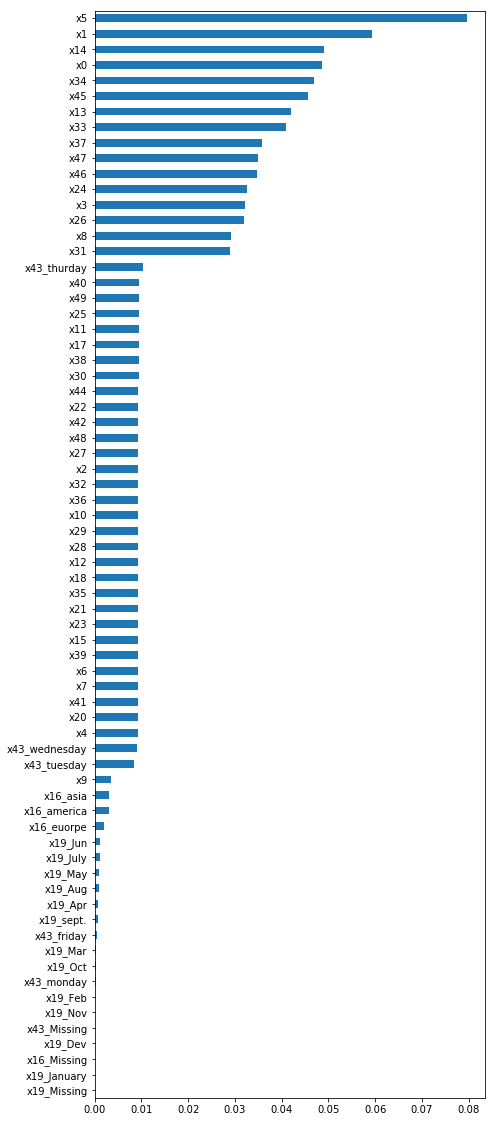

In [37]:
# Show all of the features and their relative importance
feature_importances = pd.Series(best_rfc.feature_importances_, index=data.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,20));

## Accuracy Calculation

In [38]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

Accuracy:  0.90640625


In [39]:
y_hat = best_rfc.predict(X_test)

In [40]:
y_hat

array([1, 0, 1, ..., 0, 1, 0])

In [41]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print (correct / float(total))

0.90640625


## Precision and Recall Calculation

In [42]:
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92     19169
          1       0.91      0.85      0.88     12831

avg / total       0.91      0.91      0.91     32000



In [43]:
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[18098  1071]
 [ 1924 10907]]


## AUC

In [44]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.965273020264


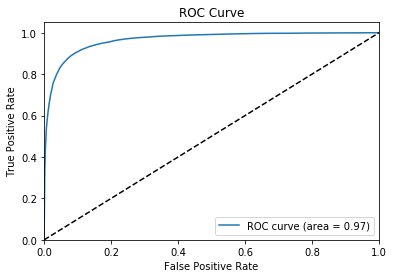

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Write Submission File

In [46]:
predictions = best_rfc.predict_proba(clean_test_data)[:,1]

In [47]:
pd.DataFrame(predictions, columns=['y']).to_csv('predictions.csv')

## Try Dropping Features that are Low Impact

In [49]:
# clean_train_data_small = clean_train_data
# clean_test_data_small = clean_test_data

drop_list = ['x19_January', 'x19_Missing', 'x16_Missing', 'x19_Dev', 'x43_Missing', 'x19_Nov', 'x19_Feb', 'x43_monday', 
             'x19_Oct', 'x19_Mar', 'x43_friday', 'x19_sept.', 'x19_Apr', 'x19_Aug', 'x19_May', 'x19_July', 'x19_Jun', 
             'x16_euorpe', 'x16_america', 'x16_asia', 'x9', 'x43_tuesday', 'x20', 'x4', 'x12', 'x41', 'x35', 'x6', 'x36', 
             'x28', 'x2', 'x18', 'x15', 'x39', 'x23', 'x7', 'x10', 'x32', 'x21', 'x22', 'x29', 'x44', 'x27', 'x38', 'x17', 
             'x42', 'x11', 'x48', 'x25', 'x30', 'x40', 'x49', 'x43_wednesday', 'x43_thurday']

# Create new dataframes
clean_train_data_small = clean_train_data.drop(drop_list, axis=1, inplace=False)
clean_test_data_small = clean_test_data.drop(drop_list, axis=1, inplace=False)

In [50]:
clean_train_data_small.shape

(160000, 16)

In [51]:
clean_test_data_small.shape

(40000, 16)

In [52]:
# Split clean_train_data into train / test
X_train, X_test, y_train, y_test = train_test_split(clean_train_data_small, y, test_size=.2, random_state=42)

In [53]:
# Grid Search
n_estimators = [2000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [2, 3]


rfc = RandomForestClassifier(n_jobs=-1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [54]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [55]:
# Choose the best estimation model
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [56]:
best_rfc = estimator.best_estimator_

In [57]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

Accuracy:  0.9224375


In [58]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

AUC Score:  0.972992101694


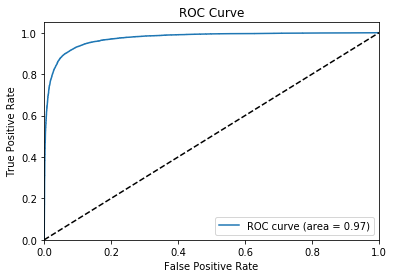

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
predictions_less = best_rfc.predict_proba(clean_test_data_small)[:,1]

In [61]:
pd.DataFrame(predictions_less, columns=['y']).to_csv('predictions_less.csv')